### Name: Atharva Shakargayen
### Roll no: 31
### Batch: B2

### 1. Implement the SIFT algorithm to detect and match key points between two images.

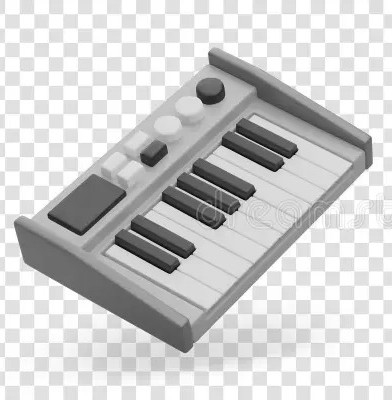

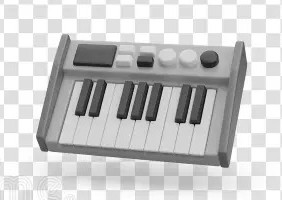

In [5]:
import cv2
from google.colab.patches import cv2_imshow
## IMG1
# Load the images
img1 = cv2.imread('img1.jpg', 0)
img2 = cv2.imread('img2.jpg', 0)

cv2_imshow(img1)
cv2_imshow(img2)

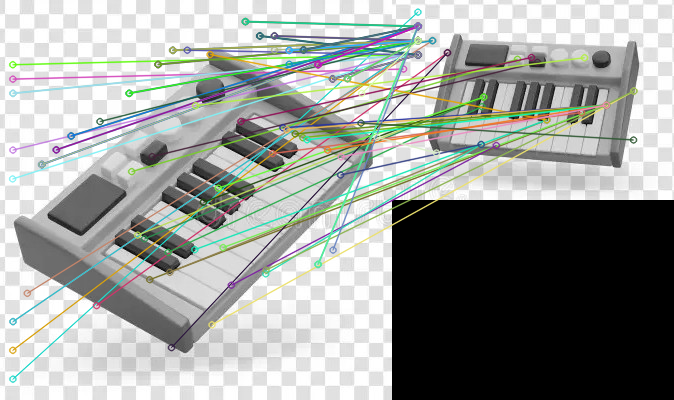

In [7]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = [m[0] for m in matches if len(m) == 2 and m[0].distance < 0.75 * m[1].distance]

matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=2)
cv2_imshow(matched_img)



Conclusion:
The SIFT algorithm successfully detected and matched keypoints between the two images, even with noticeable scale and orientation differences. It also matched the pixels or the grey and white boxes in background of actual image

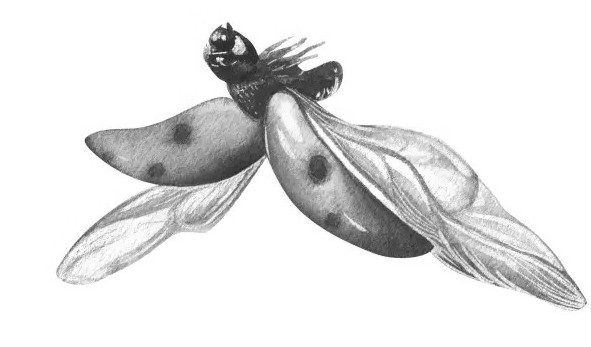

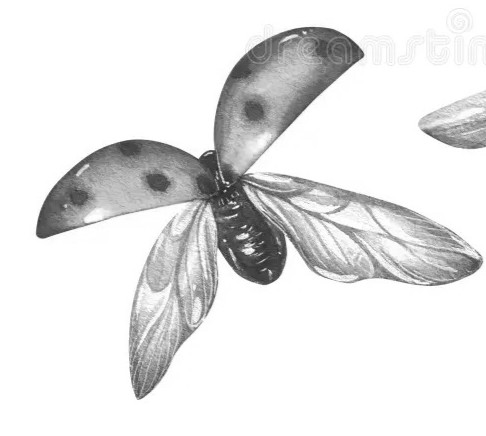

In [8]:
## IMG2

# Load the images
img1 = cv2.imread('IMGG1.jpg', 0)
img2 = cv2.imread('IMGG2.jpg', 0)

cv2_imshow(img1)
cv2_imshow(img2)

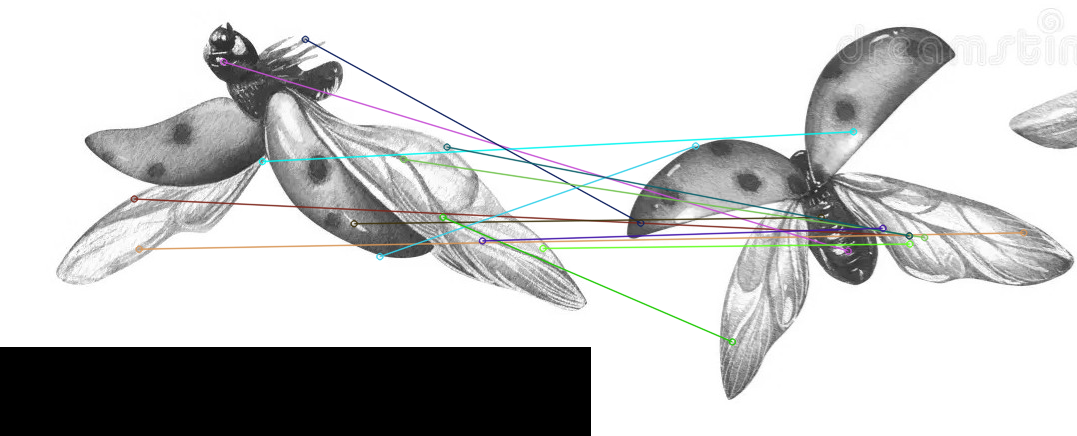

In [9]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = [m[0] for m in matches if len(m) == 2 and m[0].distance < 0.75 * m[1].distance]

matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=2)
cv2_imshow(matched_img)


Conclusion:
The SIFT algorithm effectively matched keypoints between the two images despite changes in orientation and scale. The consistent connections between **similar wing and spot regions** confirm SIFT's strong invariance to geometric transformations.

### 2. Apply the SURF algorithm to detect and match key points between two images with different scales and orientations. Using orb since surf is patented.

In [13]:
!pip install opencv-contrib-python

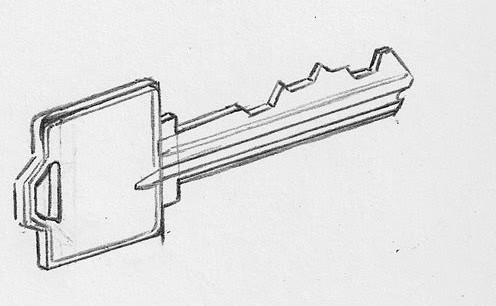

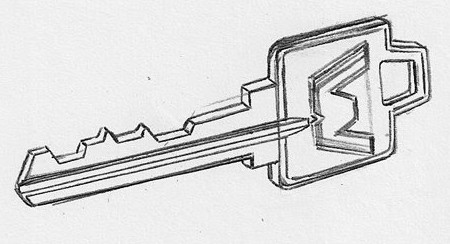

In [14]:
import cv2

# Load grayscale images
img1 = cv2.imread('SURF1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('SURF2.jpg', cv2.IMREAD_GRAYSCALE)


cv2_imshow(img1)
cv2_imshow(img2)


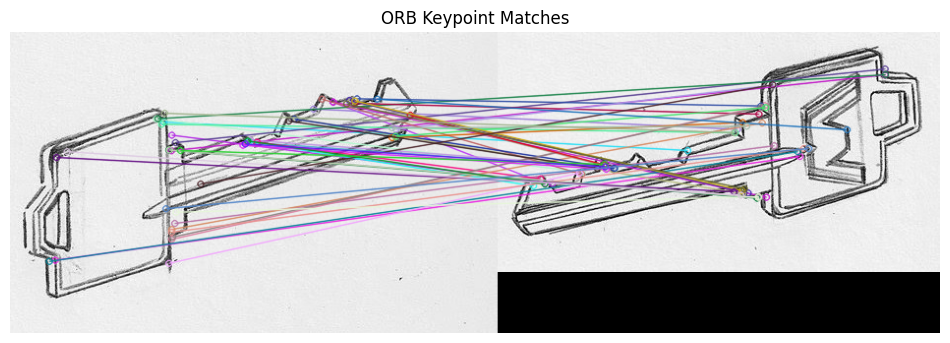

In [16]:

import matplotlib.pyplot as plt



# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher (Hamming for ORB)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches by distance (lower is better)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 50 matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

# Show result
plt.figure(figsize=(12, 6))
plt.imshow(matched_img)
plt.axis('off')
plt.title('ORB Keypoint Matches')
plt.show()


Conclusion: As we can see its detecting all the edges and matching the features quite well and all the shapes of key also has been detected.

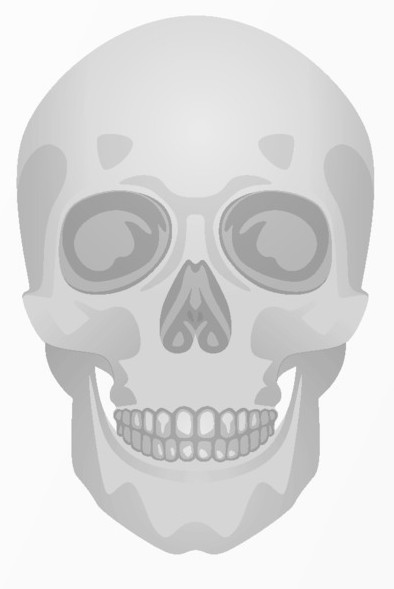

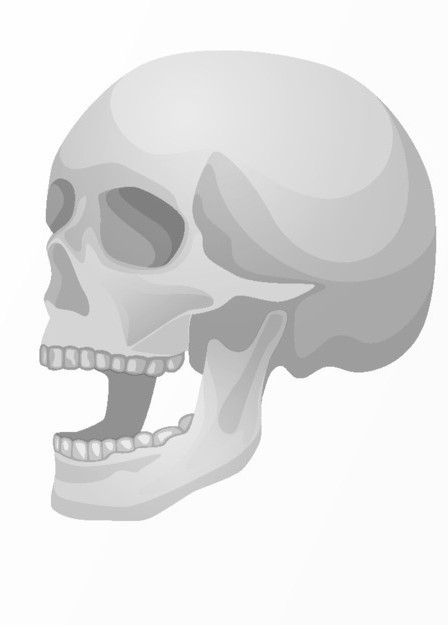

In [17]:
## IMG2

import cv2

# Load grayscale images
img1 = cv2.imread('ORB1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('ORB2.jpg', cv2.IMREAD_GRAYSCALE)


cv2_imshow(img1)
cv2_imshow(img2)


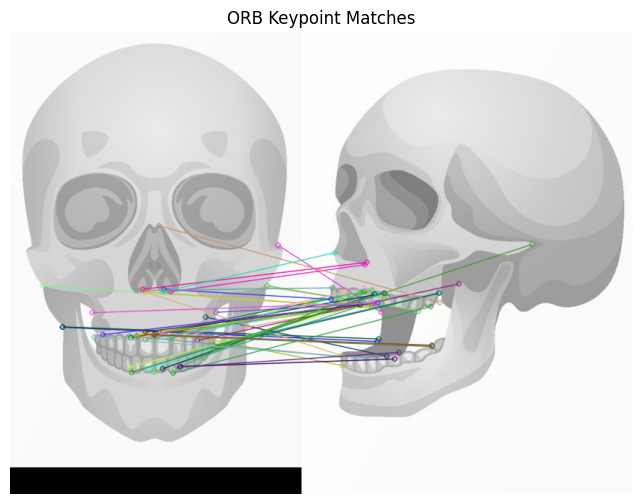

In [18]:

import matplotlib.pyplot as plt



# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher (Hamming for ORB)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches by distance (lower is better)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 50 matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

# Show result
plt.figure(figsize=(12, 6))
plt.imshow(matched_img)
plt.axis('off')
plt.title('ORB Keypoint Matches')
plt.show()

Conclusion: As we can see ORB detects the features around nose and teeth and around the jawline. It didnt detect eyes because of the shadows around eyes are different in both cases.

### 3.Use the Shi-Tomasi corner detector to identify and mark corner points in an image.

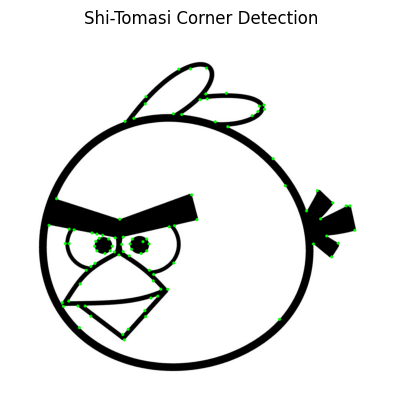

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert to grayscale
img = cv2.imread('SHI_tomasi2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = corners.astype(int)

# Draw corners
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 4, (0, 255, 0), -1)

# Display result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Shi-Tomasi Corner Detection')
plt.show()


As we cant see the corners very clearly, I clubbed Canny Edge detection along with shi tomasi to see the clean boundaries of the image

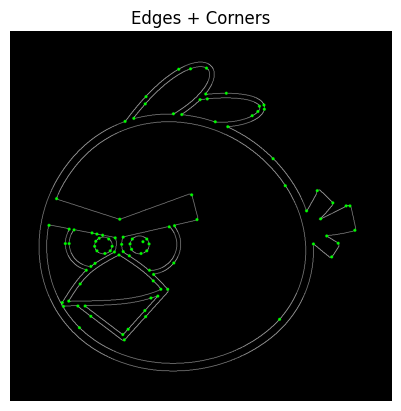

In [28]:
##IMG1
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = corners.astype(int)

# Apply Canny Edge Detection
edges = cv2.Canny(gray, threshold1=100, threshold2=200)

# Convert to color to draw in color
edge_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Draw corners on edge image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(edge_img, (x, y), 4, (0, 255, 0), -1)

# Show both combined
plt.imshow(edge_img)
plt.axis('off')
plt.title('Edges + Corners')
plt.show()


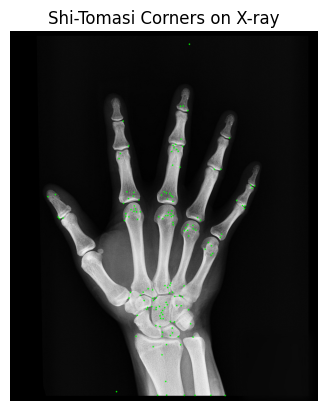

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the X-ray image
img = cv2.imread('hand-x-ray_shi.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=150, qualityLevel=0.01, minDistance=10)
corners = corners.astype(int)

# Draw the corner points
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 4, (0, 255, 0), -1)

# Show the image with corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Shi-Tomasi Corners on X-ray')
plt.show()


As we can hardly see any corners detected we will use canny edge detection along with this

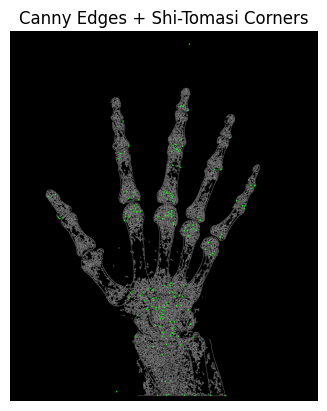

In [30]:
# Reload grayscale image for clean processing
img = cv2.imread('hand-x-ray_shi.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=150, qualityLevel=0.01, minDistance=10)
corners = corners.astype(int)

# Convert edge image to color to overlay green dots
edges_color = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Draw Shi-Tomasi corners on top of edges
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(edges_color, (x, y), 4, (0, 255, 0), -1)

# Show final result
plt.imshow(cv2.cvtColor(edges_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Canny Edges + Shi-Tomasi Corners')
plt.show()


Conclusion: The Shi-Tomasi output highlights only distinct corner points, such as finger joints and bone intersections, using green dots — focusing on high-variation points in intensity. In contrast, Canny + Shi-Tomasi outlines the entire bone structures with edges (Canny) while also marking precise corners (Shi-Tomasi), giving a more detailed and comprehensive structural visualization.